In [4]:
# https://www.statology.org/course-register/

# T-test

import scipy.stats as stats
pre = [88, 82, 84, 93, 75, 78, 84, 87, 95, 91, 83, 89, 77, 68, 91]
post = [91, 84, 88, 90, 79, 80, 88, 90, 90, 96, 88, 89, 81, 74, 92]
#perform the paired samples t-test
stats.ttest_rel(pre, post)



TtestResult(statistic=-2.9732484231168796, pvalue=0.01007144862643272, df=14)

In [5]:
# none parametric test, wilcoxon 

group1 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
group2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]


#perform the Wilcoxon-Signed Rank Test
stats.wilcoxon(group1, group2)

/Users/li11/opt/anaconda3/envs/snake/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=10.5, pvalue=0.044065400736826854)

In [7]:
import pandas as pd

#define Series
data = pd.Series([1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 5])

#find frequencies of each value
data.value_counts()

data.value_counts(sort=False)

1    3
2    1
3    4
4    2
5    1
Name: count, dtype: int64

In [12]:
#create data
df = pd.DataFrame({'Grade': ['A','A','A','B','B', 'B', 'B', 'C', 'D', 'D'],
                   'Age': [18, 18, 18, 19, 19, 20, 18, 18, 19, 19],
                   'Gender': ['M','M', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'F']})

#view data
df

#find frequency of each letter grade
pd.crosstab(index=df['Grade'], columns='count')

pd.crosstab(index=df['Age'], columns='count') 

#define crosstab
tab = pd.crosstab(index=df['Age'], columns='count')

#find proportions 
tab/tab.sum()

pd.crosstab(index=df['Age'], columns=df['Grade'])


Grade,A,B,C,D
Age,,,,
18,3,1,1,0
19,0,2,0,2
20,0,1,0,0


In [13]:
#enter exam scores for each group
group1 = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80]
group2 = [91, 92, 93, 85, 87, 84, 82, 88, 95, 96]
group3 = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]
from scipy.stats import f_oneway

#perform one-way ANOVA
f_oneway(group1, group2, group3)

F_onewayResult(statistic=2.3575322551335636, pvalue=0.11384795345837218)

In [14]:
import numpy as np
import pandas as pd

#create data
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                   'sun': np.tile(np.repeat(['low', 'med', 'high'], 5), 2),
                   'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                              6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                              4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

#view first ten rows of data 
df[:10]

,water,sun,height
0,daily,low,6
1,daily,low,6
2,daily,low,6
3,daily,low,5
4,daily,low,6
5,daily,med,5
6,daily,med,5
7,daily,med,6
8,daily,med,4
9,daily,med,5


In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('height ~ C(water) + C(sun) + C(water):C(sun)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(water),8.533333,1.0,16.0000,0.000527
C(sun),24.866667,2.0,23.3125,0.000002
C(water):C(sun),2.466667,2.0,2.3125,0.120667
Residual,12.800000,24.0,NaN,NaN


In [16]:
import numpy as np
import pandas as pd

#create DataFrame
df = pd.DataFrame({'program': np.repeat([1, 2], 20),
                   'gender': np.tile(np.repeat(['M', 'F'], 10), 2),
                   'division': np.tile(np.repeat([1, 2], 5), 4),
                   'height': [7, 7, 8, 8, 7, 6, 6, 5, 6, 5,
                              5, 5, 4, 5, 4, 3, 3, 4, 3, 3,
                              6, 6, 5, 4, 5, 4, 5, 4, 4, 3,
                              2, 2, 1, 4, 4, 2, 1, 1, 2, 1]})

#view first ten rows of DataFrame 
df[:10]

,program,gender,division,height
0,1,M,1,7
1,1,M,1,7
2,1,M,1,8
3,1,M,1,8
4,1,M,1,7
5,1,M,2,6
6,1,M,2,6
7,1,M,2,5
8,1,M,2,6
9,1,M,2,5


In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform three-way ANOVA
model = ols("""height ~ C(program) + C(gender) + C(division) +
               C(program):C(gender) + C(program):C(division) + C(gender):C(division) +
               C(program):C(gender):C(division)""", data=df).fit()

sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(program),3.610000e+01,1.0,6.563636e+01,2.983934e-09
C(gender),6.760000e+01,1.0,1.229091e+02,1.714432e-12
C(division),1.960000e+01,1.0,3.563636e+01,1.185218e-06
C(program):C(gender),3.466674e-31,1.0,6.303043e-31,1.000000e+00
C(program):C(division),4.000000e-01,1.0,7.272727e-01,4.001069e-01
C(gender):C(division),1.000000e-01,1.0,1.818182e-01,6.726702e-01
C(program):C(gender):C(division),1.000000e-01,1.0,1.818182e-01,6.726702e-01
Residual,1.760000e+01,32.0,NaN,NaN


<Axes: xlabel='total_bill', ylabel='tip'>

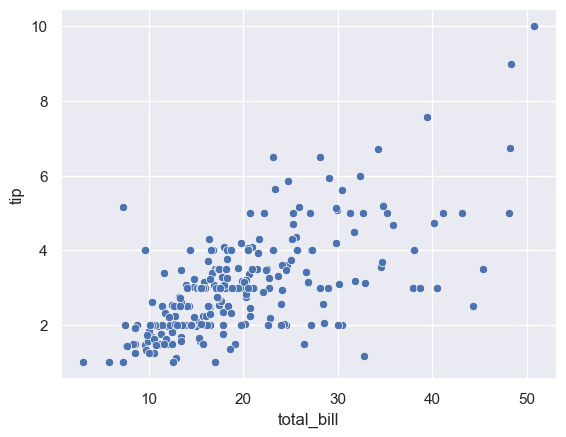

In [18]:
import seaborn as sns

#set theme
sns.set_theme(style='darkgrid')

#load tips dataset
tips = sns.load_dataset('tips')

#create scatterplot
sns.scatterplot(data=tips, x='total_bill', y='tip')

In [21]:
# bar chart plot of a categorical variable against a class variable
from pandas import read_csv
from seaborn import countplot
from matplotlib import pyplot

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
dataset = read_csv(url, header=0)
# create line plot
lineplot(x='Month', y='Sales', data=dataset)
# show plot
pyplot.show()

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv'
dataset = read_csv(url, header=None)
# create bar chart plot
countplot(x=0, data=dataset)
# show plot
pyplot.show()

# create bar chart plot
countplot(x=0, hue=9, data=dataset)
# show plot
pyplot.show()

NameError: name 'lineplot' is not defined

In [22]:
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
dataset = read_csv(url, header=0)
# create line plot
lineplot(x='Month', y='Sales', data=dataset)
# show plot
pyplot.show()

NameError: name 'lineplot' is not defined